# Volby

Nedavano byly volby. Navic to byly komunalni, coz prinasi zajimave challenge pro cistotu dat.  
Chci se podivat na nekolik veci.  
Zajima me Strana Zelenych, a chtel bych se podivat, jak vypada elektorat SZ.  
Postupuju nyni low effort/max knowledge.  
Nechci stravit moc casu mergovanim ruznych datasetu, tim se da spalit hodne casu.  
Proto jsem puvodni task "porovnej 2022 s 2018" radeji zmensil.  

Stahneme package na stahovani ceskych verejnych dat:

In [1]:
!git clone https://github.com/kokes/od.git

Cloning into 'od'...
remote: Enumerating objects: 2405, done.
remote: Counting objects: 100% (646/646), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 2405 (delta 533), reused 495 (delta 453), pack-reused 1759
Receiving objects: 100% (2405/2405), 550.20 KiB | 1.80 MiB/s, done.
Resolving deltas: 100% (1461/1461), done.


Stahneme volby pro data. U toho vytvorime novy environment, s potrebnymi zavislostmi.

In [2]:
!python3 -m venv .venv
!. .venv/bin/activate
!pip3 install -r od/requirements.txt
!python3 od/main.py volby

  Using cached dbfread-2.0.7-py2.py3-none-any.whl (20 kB)
  Using cached lxml-4.9.1.tar.gz (3.4 MB)
     |████████████████████████████████| 2.0 MB 3.8 MB/s eta 0:00:01
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
Using legacy 'setup.py install' for lxml, since package 'wheel' is not installed.
    Running setup.py install for lxml ... done
You should consider upgrading via the '/opt/homebrew/Caskroom/miniforge/base/bin/python -m pip install --upgrade pip' command.
volby
=====


In [8]:
vysledky_2022 = pd.read_csv('csv/volby/komunalni_vysledky_obce/2022-09-23_KV2022reg20220925b_kvros.csv')

### Zakladni info o datasetu

In [11]:
vysledky_2022.describe()

,OKRES,KODZASTUP,COBVODU,POR_STR_HL,OSTRANA,VSTRANA,POCSTR_SLO,HLASY_STR,PROCHLSTR,MAND_STR
count,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,23270.000000,2.326100e+04,23261.000000,23261.000000
mean,4837.019381,562384.995488,1.000258,3.778857,751.148388,177.767942,1.124022,4.615095e+03,50.027672,2.655948
std,1847.827993,23575.657337,0.016056,3.159232,295.571054,281.743913,0.388723,6.696738e+04,32.918508,2.731048
min,1100.000000,500011.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,3107.000000,545431.000000,1.000000,1.000000,801.000000,80.000000,1.000000,7.600000e+01,20.860000,1.000000
50%,5204.000000,563633.000000,1.000000,3.000000,808.000000,90.000000,1.000000,4.350000e+02,44.580000,1.000000
75%,6201.000000,581963.500000,1.000000,5.000000,901.000000,90.000000,1.000000,1.616000e+03,77.770000,4.000000
max,8106.000000,599999.000000,2.000000,29.000000,1628.000000,1628.000000,6.000000,5.828523e+06,234.220000,25.000000


In [10]:
vysledky_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23270 entries, 0 to 23269
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATUM       23270 non-null  object 
 1   OKRES       23270 non-null  int64  
 2   KODZASTUP   23270 non-null  int64  
 3   NAZEVZAST   23270 non-null  object 
 4   COBVODU     23270 non-null  int64  
 5   POR_STR_HL  23270 non-null  int64  
 6   OSTRANA     23270 non-null  int64  
 7   VSTRANA     23270 non-null  int64  
 8   NAZEVCELK   23270 non-null  object 
 9   ZKRATKAO30  23270 non-null  object 
 10  ZKRATKAO8   23270 non-null  object 
 11  POCSTR_SLO  23270 non-null  int64  
 12  SLOZENI     23270 non-null  object 
 13  HLASY_STR   23261 non-null  float64
 14  PROCHLSTR   23261 non-null  float64
 15  MAND_STR    23261 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 2.8+ MB


### Vysvetleni sloupcu:
```
DATUM       datum
OKRES       numericke oznaceni okresu v ciselniku
KODZASTUP   kod zastupitelstva, do ktereho kandiduje
NAZEVZAST   nazev zastupitelstva
COBVODU     cislo volbeniho obvodu
POR_STR_HL  poradi strany v hlasovacich listcich
OSTRANA     ? asi identifikator strany?
VSTRANA     ? -- || --
NAZEVCELK   nazev celku
ZKRATKAO30  zkratka kandidujiho celku
ZKRATKAO8   jeste vetsi zkratka kandidujiho celku
POCSTR_SLO  pocet stran v celku
SLOZENI     slozeni celku pres identifikatory stran
HLASY_STR   pocet hlasu pro celek
PROCHLSTR   procentualni vysledek
MAND_STR    pocet mandatu
```

In [49]:
zeleni_2022 = vysledky_2022.query('SLOZENI.str.contains("005")')

In [50]:
zeleni_2022.describe()

,OKRES,KODZASTUP,COBVODU,POR_STR_HL,OSTRANA,VSTRANA,POCSTR_SLO,HLASY_STR,PROCHLSTR,MAND_STR
count,113.000000,113.000000,113.0,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,4527.203540,553622.327434,1.0,5.168142,684.185841,684.185841,2.460177,31481.929204,13.631416,2.858407
std,2136.088532,25567.146013,0.0,3.070315,537.255635,537.255635,0.935752,67240.391229,10.472428,2.434379
min,1100.000000,500089.000000,1.0,1.000000,5.000000,5.000000,1.000000,369.000000,1.650000,0.000000
25%,3102.000000,539864.000000,1.0,3.000000,364.000000,364.000000,2.000000,3855.000000,6.500000,1.000000
50%,4207.000000,554529.000000,1.0,5.000000,501.000000,501.000000,2.000000,9579.000000,10.570000,2.000000
75%,6202.000000,569810.000000,1.0,7.000000,1312.000000,1312.000000,3.000000,29811.000000,16.440000,4.000000
max,8106.000000,599549.000000,1.0,15.000000,1623.000000,1623.000000,5.000000,475968.000000,61.110000,12.000000


### Zakladni informace

Na prvni dobrou z tehle tabulky vidim:
- Zeleni, jako strana, kandidovali v 113 celcich
- Tyto strany ziskaly prumerne 2.8 mandatu
- Nejvice takova strana ziskala 12 mandatu
- Nejvice take ziskali 61 procent

Nyni, kdyz uz mam predstavu s cim pracuju a co bych se mohl dozvedet, zkusim nastrelit par otazek.

 - kde ziskali nejvice mandatu, procent?
 - z kolika stran se takove celky skladaly?
 - kolik ziskali zeleni mandatu?
 - existuje nejaky vztah: #stran v koalici + velikost obce na pocet mandatu?
 - existuje nejaky vztah: vek kandidata/velikost obce na mandat?
 
To bude potrebovat nove datasety, a nejakou zakladni manipulaci s daty.

In [156]:
obce_2022 = pd.read_csv('csv/volby/komunalni_obce/2022-09-23_KV2022reg20220925b_kvrzcoco.csv')
obce_2022

,DATUM,KRAJ,OKRES,TYPZASTUP,DRUHZASTUP,KODZASTUP,NAZEVZAST,OBEC,NAZEVOBCE,ORP,CPOU,REGURAD,OBVODY,COBVODU,MANDATY,POCOBYV,TYPDUVODU,POCET_VS,STAV_OBCE
0,2022-09-23,7200,7204,1,1,500011,Želechovice nad Dřevnicí,500011,Želechovice nad Dřevnicí,7213,662,585068,0,1,15,1840,1,5,0
1,2022-09-23,7100,7105,1,1,500020,Petrov nad Desnou,500020,Petrov nad Desnou,7111,860,523704,0,1,11,1230,1,7,0
2,2022-09-23,8100,8104,1,1,500046,Libhošť,500046,Libhošť,8115,792,599191,0,1,15,1723,1,1,0
3,2022-09-23,1100,1100,2,5,500054,Praha 1,500054,Praha 1,1000,1,500054,0,1,27,26617,1,9,0
4,2022-09-23,7200,7203,1,1,500062,Krhová,500062,Krhová,7210,871,545058,0,1,15,2024,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6525,2022-09-23,8100,8104,1,6,599930,Suchdol nad Odrou,599930,Suchdol nad Odrou,8115,792,599930,0,1,15,2668,1,4,0
6526,2022-09-23,8100,8104,1,2,599948,Štramberk,599948,Štramberk,8112,791,599565,0,1,15,3467,1,5,0
6527,2022-09-23,8100,8104,1,1,599956,Tichá,599956,Tichá,8105,789,599344,0,1,11,1875,1,3,0
6528,2022-09-23,8100,8104,1,1,599964,Tísek,599964,Tísek,8101,788,599247,0,1,9,980,1,5,0


In [157]:
kandidati_2022 = pd.read_csv("csv/volby/komunalni_kandidati/2022-09-23_KV2022reg20220925b_kvrk.csv")
zeleni_kandidati_2022 = kandidati_2022.query('PSTRANA==5 | NSTRANA==5')
zeleni_kandidati_2022.query('MANDAT')

,DATUM,OKRES,KODZASTUP,COBVODU,POR_STR_HL,OSTRANA,PORCISLO,JMENO,PRIJMENI,TITULPRED,...,PSTRANA,NSTRANA,PLATNOST,POCHLASU,PRESKOCENI,POCHL_PRES,POCPROCVSE,MANDAT,PORADIMAND,PORADINAHR
277,2022-09-23,1100,500054,1,5,1373,3,Petr,Kučera,Mgr.,...,5.0,80.0,A,1827,N,NaN,3.93,True,3,0
279,2022-09-23,1100,500054,1,5,1373,5,Barbora,Kosíková,Mgr.,...,5.0,80.0,A,1744,N,NaN,3.76,True,5,0
280,2022-09-23,1100,500054,1,5,1373,6,Pavel,Marc,JUDr.,...,5.0,80.0,A,1761,N,NaN,3.79,True,6,0
1089,2022-09-23,1100,500097,1,10,364,1,Ondřej,Rut,Mgr.,...,5.0,5.0,A,1913,A,NaN,4.25,True,1,0
1091,2022-09-23,1100,500097,1,10,364,3,Matěj Michalk,Žaloudek,Ing. arch.,...,5.0,5.0,A,1754,A,NaN,3.89,True,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167539,2022-09-23,7103,589250,1,2,1612,6,Martin,Hájek,Mgr.,...,5.0,5.0,A,2264,A,NaN,3.34,True,2,0
173941,2022-09-23,7202,592064,1,2,902,1,Roman,Jílek,Ing.,...,5.0,80.0,A,525,A,NaN,12.97,True,1,0
193012,2022-09-23,8104,599191,1,1,1351,1,Ondřej,Syrovátka,NaN,...,5.0,5.0,A,1556,A,NaN,4.89,True,1,0
193015,2022-09-23,8104,599191,1,1,1351,4,Lucie,Jančařiková,NaN,...,5.0,5.0,A,1172,N,NaN,3.68,True,5,0


### Pocty mandatu, deeper dive

**Zeleni ziskali 142 mandatu.**  
Tohle cislo bohuzel nesedi na oficialni prohlaseni strany:  
*V aktuálních komunálních volbách jsme kandidovali ve 144 obcí a měst,  
po volbách máme 162 zastupitelských mandátů.*

Tady by sly delat dalsi operace. Zde je filtrovani kandidatu je jednoduche, delane pouze podle kodu strany.  
Myslim si, ze do oficialniho poctu se pouzivaji take nezavisli kandidati z ruznych koalic, kteri ale maji jiny kod.  
Ti by sli vyfiltrovat skrz nazev strany (obsahuje 'zelen').  
coz by ale zas mohlo prinest jine problemy (koukam na tebe, demokraticka strano zelenych)  
Pro ted ale budu pracovat uz jen s timto seznamem.

In [158]:
zeleni_zastupitelstvo_mandaty = zeleni_kandidati_2022.groupby(['KODZASTUP']).agg({'MANDAT': 'sum', 'PRIJMENI':'count'})
zeleni_zastupitelstvo_mandaty = zeleni_zastupitelstvo_mandaty.rename(columns={'PRIJMENI': 'POCET_KANDIDUJICICH_ZELENYCH'})
zeleni_zastupitelstvo_mandaty

,MANDAT,POCET_KANDIDUJICICH_ZELENYCH
KODZASTUP,,
500054,3,7
500089,0,14
500097,2,22
500119,5,19
500143,0,19
...,...,...
599026,0,1
599191,3,13
599212,0,1


Pocet obci, kde zeleni kandidovali, vychazi na 155. To je vice, nez oficialni cislo.  
Ocekavam, ze zde se kryji ctvrti/magistrat, jako tomu napriklad bylo v Praze.

In [192]:
vysledky_2022['N_STRAN'] = vysledky_2022['SLOZENI'].str.count(',') + 1
zelene_strany = (vysledky_2022
                 .query('NAZEVCELK.str.lower().str.contains("zelen") | SLOZENI.str.contains("005")')
                 [['KODZASTUP', 'HLASY_STR', 'SLOZENI', 'NAZEVCELK', 'N_STRAN']])
zelene_strany

,KODZASTUP,HLASY_STR,SLOZENI,NAZEVCELK,N_STRAN
31,500089,20233.0,"001,005,007",Dvojka solidární a zelená,3
47,500097,45003.0,"005,080",Zelení Praha 3,2
60,500119,273219.0,"005,080",Praha 4 sobě – sousedé a nezávislí,2
70,500143,41873.0,"001,005","KDU-ČSL, Zelení a Nezávislí",2
82,500160,607.0,080,Zelená pro Libavou,1
...,...,...,...,...,...
22843,598925,1622.0,"005,080",ZELENÍ V ALBRECHTICÍCH,2
23009,599191,31776.0,"005,166,720,721","Strana zelených s Piráty, TOP 09 a STAN",4
23048,599280,28.0,080,Miroslav Zelenka,1
23148,599549,2134.0,"005,007,080",Budoucnost pro Klimkovice - sdružení nezávislý...,3


In [236]:
model_data = zeleni_zastupitelstvo_mandaty.reset_index()
model_data = model_data.merge(obce_2022[['KODZASTUP', 'TYPZASTUP', 'DRUHZASTUP', 'NAZEVZAST', 'MANDATY', 'POCOBYV']], on='KODZASTUP', how='inner')
# jednotlive casti pri volbach na i.e. velkou Prahu jsou zastoupeny v datech, ale samotna data jsou validni
model_data = model_data.drop_duplicates()

model_data = model_data.merge(zelene_strany[['KODZASTUP', 'N_STRAN']], on='KODZASTUP', how='left')
model_data['ZELENI_SHARE'] = model_data['POCET_KANDIDUJICICH_ZELENYCH']/model_data['MANDATY']
model_data = model_data.rename(columns={'MANDAT':'N_MANDATU_ZELENI', 'MANDATY':'VELIKOST_OBCE_MANDATY'})
model_data['CHYBI_V_NAZVU'] = model_data['N_STRAN'].isna() * 1 # hack, at si statsm nestezuji

**OH NO.**  
Z dat se vytratili kandidati, kteri pod jinym stranami kandidovali jako NK.  
Priklad - Praha 1 Sobe. Za tuto stranu 3 kandidati SZ postoupili.  
Udelal jsem tomu flag, i nad tim bude zajimava regrese.  
bohuzel ted musim vyresit, ze se mi ztratily `N_STRAN` pro nektere obce, jedna se o cca 50 pripadu.  
- good guess je 2 - kandiduji s jinou stranou, nebude to moc kazit vysledky.  
Pro nektere, kde je stran vice to ale pravda nebude.  
Nemuzu navic uz pouzit OLS, protoze v datech bude linearni kombinace.
- dalsi dobry odhad je 1/share zelenych - muze se ale stat, ze to cislo vystreli nekam pryc.  
- Spravny reseni je se vratit a najoinovat to korektne.  

=> pouziju 2 jako input & pouziju GLS, ktery si s tim poradi.

In [249]:
model_data.loc[model_data['N_STRAN'].isna(), 'N_STRAN'] = 2
model_data = model_data.reset_index(drop=True).drop_duplicates()

## Modelovani

In [250]:
variables_to_use = [
#     'ZELENI_SHARE',
    'N_STRAN',
    'VELIKOST_OBCE_MANDATY',
    'CHYBI_V_NAZVU',
]

Puvodne jsem pouzival OLS regresi.  
Kdyz jsem ale pridal `CHYBI_V_NAZVU`, v datech je nyni linearni kombinace.  
Pouzivam tu proto generalized least squares, ktere si s tim poradi.

In [251]:
model = sm.GLS(endog=model_data['N_MANDATU_ZELENI'], exog=model_data[variables_to_use])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:       N_MANDATU_ZELENI   R-squared (uncentered):                   0.331
Model:                            GLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              26.07
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                    9.36e-14
Time:                        15:46:11   Log-Likelihood:                         -267.30
No. Observations:                 161   AIC:                                      540.6
Df Residuals:                     158   BIC:                                      549.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
N_STRAN                   0.2422      0.088      2.750      0.007       0.068       0.416
VELIKOST_OBCE_MANDATY     0.0152      0.008      1.893      0.060      -0.001       0.031
CHYBI_V_NAZVU            -0.5243      0.215     -2.434      0.016      -0.950      -0.099
==============================================================================
Omnibus:                       83.490   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.936
Skew:                           2.007   Prob(JB):                     2.52e-74
Kurtosis:                       8.866   Cond. No.                         58.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

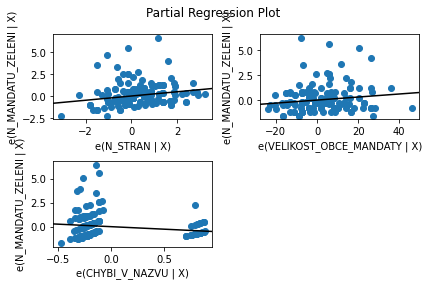

In [252]:
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)

**Co to vlastne vidime?**

Hodil jsem jednoduchou regresi, abych se podival na vztah mezi vysvetlovanou promenou `N_MANDATU_ZELENI` - pocet mandatu ziskanych v danem okrsku pro SZ a  
 - `N_STRAN` - kolik stran se ucastnilo dane koalice?
 - `VELIKOST_OBCE_MANDATY` - proxy za velikost obce - celkovy pocet mandatu. Ma vyhodu, ze uz je standardizovana.
 - `CHYBI_V_NAZVU` - zda SZ je nejak reprezentovana v nazvu.

Zkousel jsem do modelu pridat jeste promennou `ZELENI_SHARE`, ktera ukazuje podil SZ v dane koalici.  
Tu jsem nakonec vyhodil kvuli endogennimu efektu na `N_MANDATU_ZELENI`.

Pokud maji zeleni vyssi SHARE v zastoupene strane, pak ziskaji vice mandatu,  
ale vice mandatu je nutne zavisle na poctu kandidujicich Zelenych.  
`N_STRAN` je podle me dobra proxy za tuto promennou.<sup>1</sup>

**Jak vypada vztah?**  
Model vysvetlil cca 33% variance, coz na politologicky model neni uplne spatne.

- Ukazuje se, <em><b>ze 1 pridana strana v koalici pridava ma pro SZ potencial 0.2 mandatu</b></em>  
- Vztah velikosti obce (poctu mandatu) neni signifikantni. <em><b>10 mandatu obce pridava SZ potencial pro 0.2 mandatu</b></em>.
- Pokud SZ v nazvu chybi, <em><b>ma to negativni efekt na pocet mandatu pro SZ (cca 0.5 mandatu). </b></em> Je to signifikantni!


---
<sup>1</sup> - Pro lepsi vysledky by bylo dobry utilizovat napriklad 2SLS, kdy bych odhadoval N_STRAN pomoci ZELENI_SHARE, a tuto regresi bych nasledne utilizoval ve finalni regresi.

### Prekvapive vysledky?

In [253]:
model_data['PREDIKCE'] = results.predict(model_data[variables_to_use])
model_data['DIFF'] = model_data['N_MANDATU_ZELENI'] - model_data['PREDIKCE']
model_data.sort_values('DIFF')

,KODZASTUP,N_MANDATU_ZELENI,POCET_KANDIDUJICICH_ZELENYCH,TYPZASTUP,DRUHZASTUP,NAZEVZAST,VELIKOST_OBCE_MANDATY,POCOBYV,N_STRAN,ZELENI_SHARE,CHYBI_V_NAZVU,PREDIKCE,DIFF
85,554782,0,25,1,4,Praha hl.m.,65,1275406,4.0,0.384615,0,1.955560,-1.955560
86,554782,0,25,1,4,Praha hl.m.,65,1275406,2.0,0.384615,0,1.471232,-1.471232
7,500208,0,16,2,5,Praha 8,45,102847,3.0,0.355556,0,1.409734,-1.409734
9,500224,0,17,2,5,Praha 10,45,109144,3.0,0.377778,0,1.409734,-1.409734
81,554481,0,8,1,2,Cheb,29,30420,4.0,0.275862,0,1.408968,-1.408968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,547387,5,5,2,5,Praha 15,31,33722,4.0,0.161290,0,1.439334,3.560666
3,500119,5,19,2,5,Praha 4,45,126070,2.0,0.422222,0,1.167569,3.832431
107,563889,6,39,1,3,Liberec,39,102951,2.0,1.000000,0,1.076471,4.923529
97,560928,6,15,1,2,Kladruby,15,1610,1.0,1.000000,0,0.469911,5.530089


Nejprekvapivejsi je prazsky magistrat, kde se ocekavaly alespon cca 2 mandaty, a nedopadlo to vubec.  
Stejne tak P8, P10.  
Horni Jiretin je zajimavy, ale vzhledem k tomu, ze je hned vedle uhelneho dolu to tak prekvapive neni.  
Nadprumerne vysledky na P4, v Liberci & P15 rozhodne stoji za oceneni.

## Kandidati, vek, obec

In [259]:
kandidati_obec = zeleni_kandidati_2022.merge(obce_2022[['KODZASTUP', 'TYPZASTUP', 'DRUHZASTUP', 'NAZEVZAST', 'MANDATY', 'POCOBYV']], on='KODZASTUP', how='left').drop_duplicates()

In [262]:
kandidati_obec.columns

Index(['DATUM', 'OKRES', 'KODZASTUP', 'COBVODU', 'POR_STR_HL', 'OSTRANA',
       'PORCISLO', 'JMENO', 'PRIJMENI', 'TITULPRED', 'TITULZA', 'VEK',
       'POVOLANI', 'BYDLISTEN', 'PSTRANA', 'NSTRANA', 'PLATNOST', 'POCHLASU',
       'PRESKOCENI', 'POCHL_PRES', 'POCPROCVSE', 'MANDAT', 'PORADIMAND',
       'PORADINAHR', 'TYPZASTUP', 'DRUHZASTUP', 'NAZEVZAST', 'MANDATY',
       'POCOBYV'],
      dtype='object')

In [261]:
import plotly_express as px

In [266]:
px.scatter(kandidati_obec, x='VEK', y='MANDATY', color='MANDAT')

Z predchoziho grafu to vypada, ze by tam nejaka zavislost mohla byt. Zkusime vyfiltrovat.

In [267]:
px.scatter(kandidati_obec.query('MANDAT'), x='VEK', y='MANDATY', color='MANDAT')

K tomuto grafu mam jen muj oblibeny komiks:  
<img width="500" src="https://imgs.xkcd.com/comics/linear_regression_2x.png">